<a href="https://colab.research.google.com/github/AltagiAbdallah/My_Credit_Scoring_Model_Project/blob/main/My_Credit_Scoring_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Credit Scoring Model Project

---

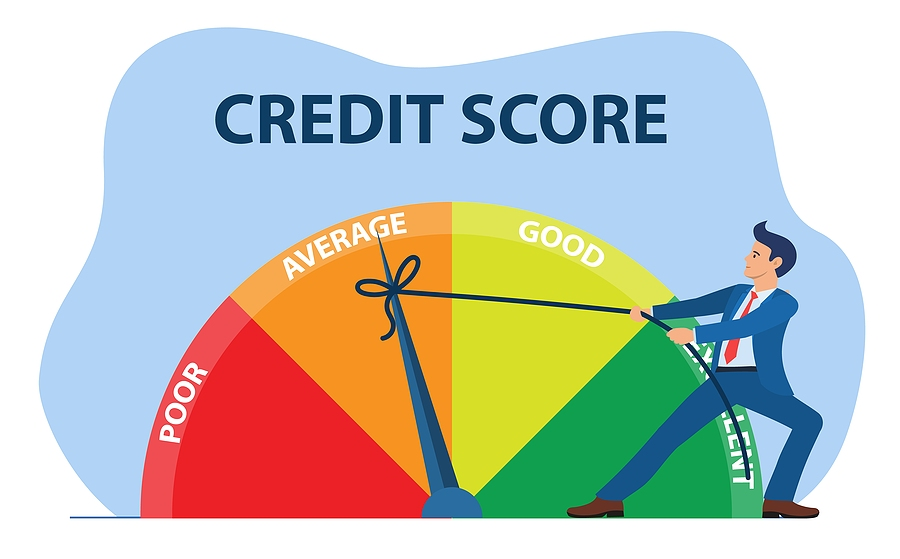

***Importing libraries***

In [61]:
# Importing libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


**Section 1: Data Loading & Initial Inspection**

---



*1.1 Connecting My Google Drive*



In [12]:
# 1.1 Connecting my Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*1.2 Data Loading*

In [13]:
# 1.2 Loading My Datasets
# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/Credit Score Classification/train.csv')

# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/Credit Score Classification/test.csv')

print("Train data loaded successfully!")
print("Test data loaded successfully!")

/tmp/ipython-input-13-1796326825.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Credit Score Classification/train.csv')


Train data loaded successfully!
Test data loaded successfully!


*1.3 Performing Initial Data Checks*



In [14]:
# 1.3 Performing Initial Data Checks

# I want to see the first few rows of my training data to confirm it looks right.
print("\n--- My Train DataFrame Head (First Glance): ---")
print(train_df.head())

# And also for my test data.
print("\n--- My Test DataFrame Head (First Glance): ---")
print(test_df.head())

# I'm checking the info for my training DataFrame: data types, non-null counts, and memory usage.
print("\n--- My Train DataFrame Info: ---")
train_df.info()

# Doing the same for my test DataFrame.
print("\n--- My Test DataFrame Info: ---")
test_df.info()

# I'm quickly checking for any missing values in my training data.
print("\n--- Missing Values Summary for My Train DataFrame: ---")
print(train_df.isnull().sum())

# And for my test data.
print("\n--- Missing Values Summary for My Test DataFrame: ---")
print(test_df.isnull().sum())


--- My Train DataFrame Head (First Glance): ---
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

 

**Section 2: Exploratory Data Analysis (EDA)**

---



*2.1 Reviewing Basic Data Information and Missing Values*

In [15]:
# 2.1 Reviewing Basic Data Information and Missing Values

# A quick re-check of my DataFrame info for comprehensive details.
print("--- Detailed Info for My Train DataFrame: ---")
train_df.info()
print("\n--- Detailed Info for My Test DataFrame: ---")
test_df.info()

# I'm listing only the columns that actually have missing values and their counts.
print("\n--- Specific Missing Values in My Train DataFrame: ---")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("\n--- Specific Missing Values in My Test DataFrame: ---")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

--- Detailed Info for My Train DataFrame: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13 

*2.2 Summarizing Numerical and Categorical Features*

In [16]:
# 2.2 Summarizing Numerical and Categorical Features

# Getting descriptive statistics for my numerical features in the training data.
print("\n--- Descriptive Statistics for My Numerical Features (Train): ---")
print(train_df.describe())
print("\n--- Descriptive Statistics for My Numerical Features (Test): ---")
print(test_df.describe())

# I'm listing my important categorical columns to check their value distributions.
# I might add more columns here as I discover them during exploration.
my_key_categorical_cols = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Occupation', 'Month']
print("\n--- Value Counts for My Key Categorical Columns (Train): ---")
for col in my_key_categorical_cols:
    if col in train_df.columns:
        print(f"\nValue Counts for '{col}':")
        print(train_df[col].value_counts())


--- Descriptive Statistics for My Numerical Features (Train): ---
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000           

*2.3 Visualizing Key Distributions*

/tmp/ipython-input-17-1263878026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=train_df, palette='viridis')


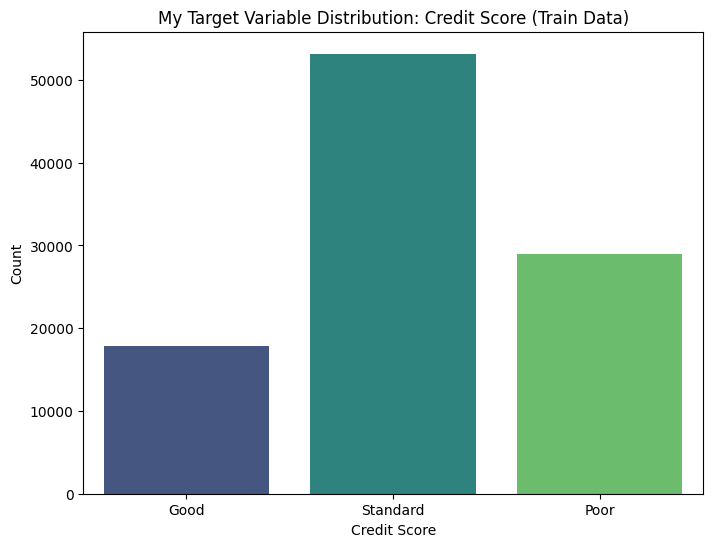

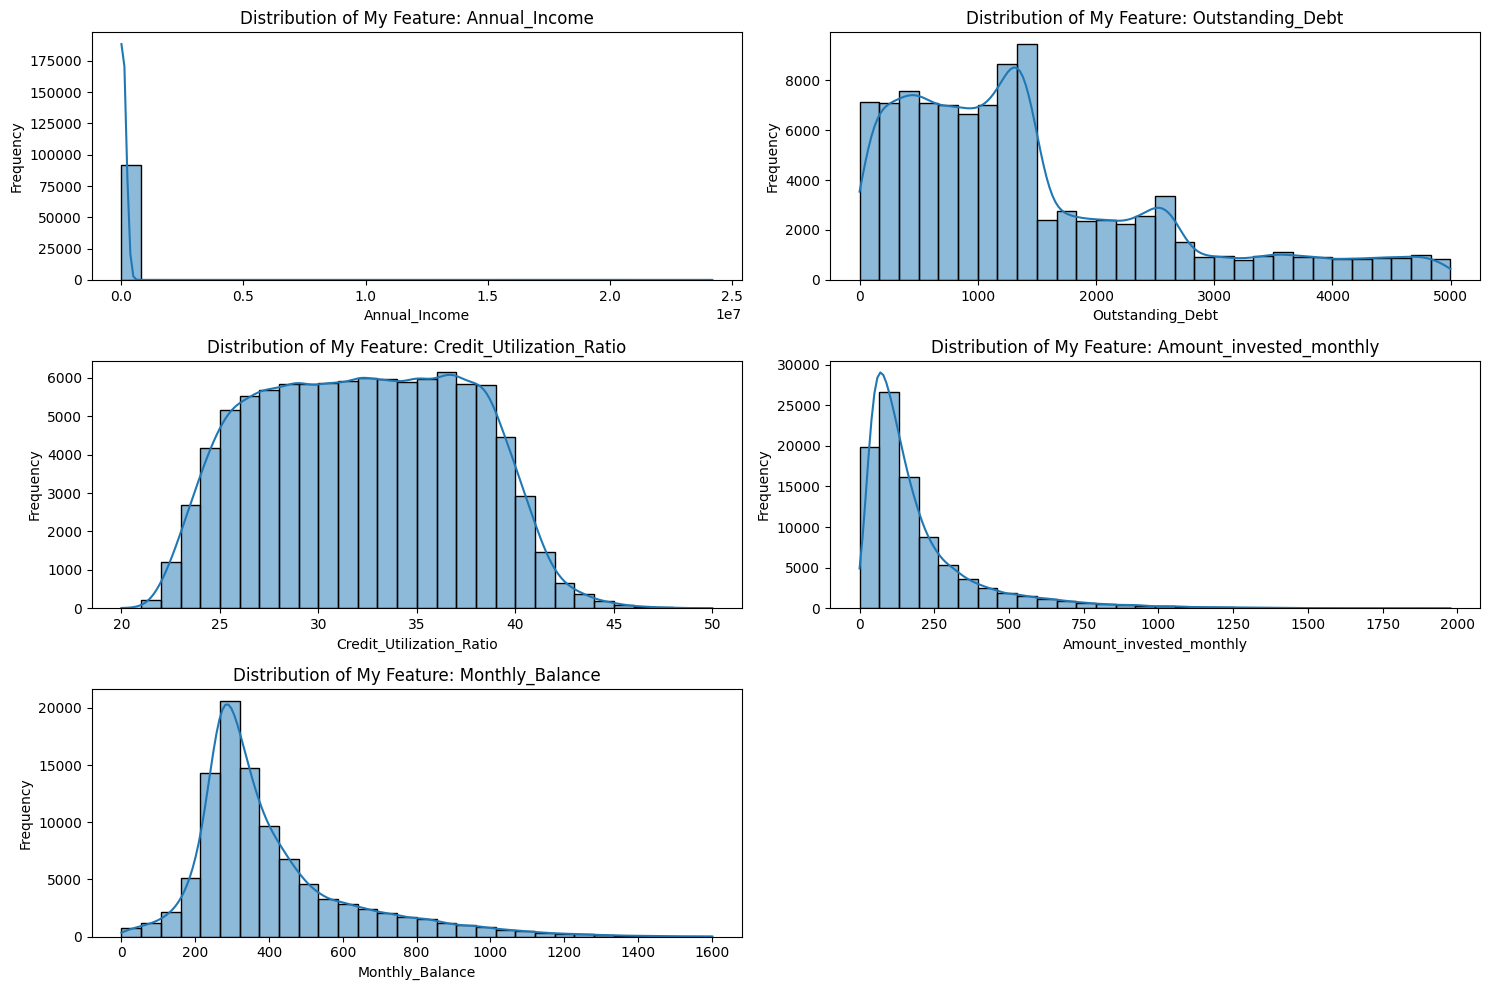

In [17]:
# 2.3 Visualizing Key Distributions

# I want to see the distribution of my target variable, 'Credit_Score'.
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_Score', data=train_df, palette='viridis')
plt.title('My Target Variable Distribution: Credit Score (Train Data)')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

# I'm selecting a few numerical features to visualize their distributions (histograms with KDE).
my_numerical_features_for_hist = ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Balance'] # Added Monthly_Balance

plt.figure(figsize=(15, 10))
for i, col in enumerate(my_numerical_features_for_hist):
    plt.subplot(3, 2, i + 1) # Arranging these plots in a 3x2 grid to accommodate the added column
    # Attempt to convert to numeric and drop NaNs before plotting
    sns.histplot(pd.to_numeric(train_df[col], errors='coerce').dropna(), kde=True, bins=30)
    plt.title(f'Distribution of My Feature: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout() # Making sure plots don't overlap.
plt.show()

*2.4 Exploring Relationships Between Features*

/tmp/ipython-input-29-1999364197.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Annual_Income_numeric', data=train_df, palette='pastel')


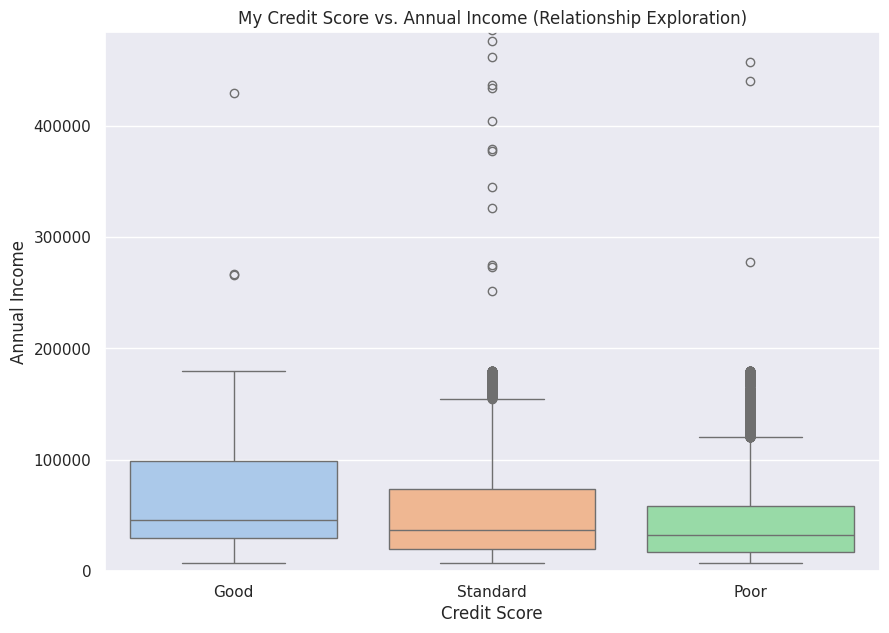


--- My Numerical Feature Correlation Matrix (Train Data - Outliers Removed) ---
Correlation values range from -1 to 1.
- Values close to 1 indicate a strong positive linear relationship (as one feature increases, the other tends to increase).
- Values close to -1 indicate a strong negative linear relationship (as one feature increases, the other tends to decrease).
- Values close to 0 indicate a weak or no linear relationship.

Note: Low correlation doesn't necessarily mean features are not important, as relationships might be non-linear or influenced by categorical features.


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.000980,0.009988,-0.006259,-0.004826,-0.003551,-0.001055,-0.020816,-0.006422,-0.013858,-0.007388,-0.013949,-0.009457,-0.004350,0.007103,0.009246
Annual_Income,0.000980,1.000000,0.336925,-0.020859,-0.003623,-0.012767,-0.007666,-0.079894,-0.033740,-0.052598,-0.018202,-0.084421,0.054883,0.015867,0.206527,0.232992
Monthly_Inhand_Salary,0.009988,0.336925,1.000000,-0.066443,-0.025346,-0.033199,-0.027495,-0.234732,-0.103163,-0.160444,-0.048819,-0.262833,0.166532,0.033577,0.618552,0.690771
Num_Bank_Accounts,-0.006259,-0.020859,-0.066443,1.000000,0.021877,0.016573,0.017403,0.132575,0.056994,0.078063,0.019199,0.125965,-0.016806,0.004047,-0.046721,-0.071567
Num_Credit_Card,-0.004826,-0.003623,-0.025346,0.021877,1.000000,0.003158,0.009624,0.052373,0.018373,0.022671,0.007558,0.052745,-0.010980,0.003939,-0.015504,-0.024738
Interest_Rate,-0.003551,-0.012767,-0.033199,0.016573,0.003158,1.000000,0.011962,0.081157,0.027229,0.050516,0.013954,0.097061,-0.015727,0.001939,-0.016909,-0.047609
Num_of_Loan,-0.001055,-0.007666,-0.027495,0.017403,0.009624,0.011962,1.000000,0.061267,0.019749,0.043838,0.018239,0.078803,-0.004085,0.005241,-0.020071,-0.050651
Delay_from_due_date,-0.020816,-0.079894,-0.234732,0.132575,0.052373,0.081157,0.061267,1.000000,0.205266,0.277231,0.094267,0.565843,-0.054928,0.000855,-0.163695,-0.266771
Num_of_Delayed_Payment,-0.006422,-0.033740,-0.103163,0.056994,0.018373,0.027229,0.019749,0.205266,1.000000,0.122714,0.033354,0.193564,-0.023733,-0.001447,-0.071334,-0.108493
Changed_Credit_Limit,-0.013858,-0.052598,-0.160444,0.078063,0.022671,0.050516,0.043838,0.277231,0.122714,1.000000,0.059606,0.438837,-0.039193,0.005497,-0.111262,-0.192057


In [29]:
# 2.4 Exploring Relationships Between Features
# Check if train_df was loaded before proceeding
if train_df is not None:
    # 2.4 Exploring Relationships Between Features

    # I'm using a box plot to see how 'Annual_Income' varies across different 'Credit_Score' categories.
    plt.figure(figsize=(10, 7))
    # Setting a y-limit to exclude extreme outliers for better visualization
    # Ensure 'Annual_Income' and 'Credit_Score' are in train_df and handle potential non-numeric in 'Annual_Income' for plotting
    if 'Annual_Income' in train_df.columns and 'Credit_Score' in train_df.columns:
        # Convert 'Annual_Income' to numeric for plotting, coercing errors
        train_df['Annual_Income_numeric'] = pd.to_numeric(train_df['Annual_Income'], errors='coerce')
        sns.boxplot(x='Credit_Score', y='Annual_Income_numeric', data=train_df, palette='pastel')
        plt.title('My Credit Score vs. Annual Income (Relationship Exploration)')
        plt.xlabel('Credit Score')
        plt.ylabel('Annual Income')
        # Calculate quantile on the numeric column, dropping NaNs
        if train_df['Annual_Income_numeric'].dropna().shape[0] > 0:
            # Set y-limit to a reasonable quantile (e.g., 95th or 99th) to focus on the main distribution
            plt.ylim(0, train_df['Annual_Income_numeric'].quantile(0.99))
        plt.show()
        train_df.drop('Annual_Income_numeric', axis=1, inplace=True) # Drop the temporary column


    # I want to see the correlation matrix of my numerical features. This tells me how strongly they relate to each other.

    # Identify columns that should be numeric for correlation, including those that might be objects
    all_potential_numeric_cols = [
        'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
        'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Monthly_Balance'
    ]

    # Create a temporary DataFrame with only these potential numeric columns
    temp_df_numeric = train_df[all_potential_numeric_cols].copy()

    # Apply robust cleaning and conversion to numeric
    for col in temp_df_numeric.columns:
        # Convert to string to handle various input types
        temp_df_numeric[col] = temp_df_numeric[col].astype(str)
        # Remove ALL non-numeric characters except decimal point and potential hyphen
        temp_df_numeric[col] = temp_df_numeric[col].str.replace('[^0-9.\-]', '', regex=True)
        # Convert to numeric, coercing errors to NaN
        temp_df_numeric[col] = pd.to_numeric(temp_df_numeric[col], errors='coerce')

    # Drop any columns that couldn't be converted to numeric (e.g., if they were entirely non-numeric strings)
    temp_df_numeric = temp_df_numeric.select_dtypes(include=np.number)

    # Convert any remaining pd.NA to np.nan explicitly
    temp_df_numeric = temp_df_numeric.replace(pd.NA, np.nan)

    # --- Handle Outliers (using Z-score) to potentially enhance correlation ---
    # Ensure the DataFrame is purely numeric and handle potential inf values before zscore
    temp_df_numeric_cleaned_for_zscore = temp_df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

    if not temp_df_numeric_cleaned_for_zscore.empty:
        z_scores = np.abs(stats.zscore(temp_df_numeric_cleaned_for_zscore))

        # Define a threshold for identifying outliers (e.g., Z-score greater than 3)
        outlier_threshold = 3

        # Get the indices of rows that do NOT contain outliers in the original temp_df_numeric
        # Need to map back the indices from the dropna() DataFrame
        original_indices = temp_df_numeric_cleaned_for_zscore.index
        not_outliers_mask = (z_scores < outlier_threshold).all(axis=1)
        not_outliers_indices = original_indices[not_outliers_mask]


        # Filter the DataFrame to exclude rows with outliers
        temp_df_numeric_cleaned = temp_df_numeric.loc[not_outliers_indices].copy()

        # Calculate correlation matrix
        corr_matrix = temp_df_numeric_cleaned.corr()

        # Calculate p-values for the correlations
        # This is a simplified approach and assumes Pearson correlation
        def calculate_pvalues(df):
            df = df.dropna()._get_numeric_data()
            dfcols = pd.DataFrame(columns=df.columns, index=df.columns)
            for r in df.columns:
                for c in df.columns:
                    if r == c:
                        dfcols.loc[r, c] = 0.0
                    else:
                        # Perform Pearsonr test
                        corr, p_value = stats.pearsonr(df[r], df[c])
                        dfcols.loc[r, c] = p_value
            return dfcols

        p_values_matrix = calculate_pvalues(temp_df_numeric_cleaned)


        # Display the correlation matrix and p-values
        print("\n--- My Numerical Feature Correlation Matrix (Train Data - Outliers Removed) ---")
        print("Correlation values range from -1 to 1.")
        print("- Values close to 1 indicate a strong positive linear relationship (as one feature increases, the other tends to increase).")
        print("- Values close to -1 indicate a strong negative linear relationship (as one feature increases, the other tends to decrease).")
        print("- Values close to 0 indicate a weak or no linear relationship.")
        print("\nNote: Low correlation doesn't necessarily mean features are not important, as relationships might be non-linear or influenced by categorical features.")
        display(corr_matrix)

        print("\n--- P-values for Numerical Feature Correlations (Train Data - Outliers Removed) ---")
        print("P-values help determine the statistical significance of the correlation.")
        print("- A small p-value (e.g., < 0.05) suggests the correlation is statistically significant.")
        print("- A large p-value suggests the correlation is likely due to random chance.")
        display(p_values_matrix)

    else:
        print("\n--- Could not calculate correlation matrix and p-values: No numeric data without outliers found. ---")


else:
    print("Skipping plotting and correlation due to data loading error.")

**Section 3: Data Preprocessing**

---



*3.1 Handling Missing Values*

In [51]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Check if dataframes were loaded before proceeding
if train_df is not None and test_df is not None:
    # Make copies of the original DataFrames to work on.
    train_df_processed = train_df.copy()
    test_df_processed = test_df.copy()

    # Handling Missing Values

    # Numerical columns to impute with the mean.
    my_numerical_cols_to_impute = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Age', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_of_Delayed_Payment']

    for col in my_numerical_cols_to_impute:
        if col in train_df_processed.columns:
            # Ensure column is numeric before checking for NaNs and imputing
            train_df_processed[col] = pd.to_numeric(train_df_processed[col], errors='coerce')
            if train_df_processed[col].isnull().any():
                my_num_imputer = SimpleImputer(strategy='mean')
                # Reshape data for imputer if it's not 2D
                if train_df_processed[col].ndim == 1:
                     train_df_processed[col] = my_num_imputer.fit_transform(train_df_processed[[col]]).flatten()
                else:
                    train_df_processed[col] = my_num_imputer.fit_transform(train_df_processed[[col]])

            # Use the SAME imputer (fitted on training data) for the test data.
            if col in test_df_processed.columns:
                 test_df_processed[col] = pd.to_numeric(test_df_processed[col], errors='coerce')
                 if test_df_processed[col].isnull().any():
                    # Reshape data for imputer if it's not 2D
                    if test_df_processed[col].ndim == 1:
                         test_df_processed[col] = my_num_imputer.transform(test_df_processed[[col]]).flatten()
                    else:
                        test_df_processed[col] = my_num_imputer.transform(test_df_processed[[col]])


    # Categorical columns to impute with the most frequent value (mode).
    my_categorical_cols_to_impute = ['Credit_Mix', 'Payment_of_Min_Amount', 'Type_of_Loan', 'Name', 'Credit_History_Age', 'Payment_Behaviour', 'Occupation', 'Month']

    for col in my_categorical_cols_to_impute:
        if col in train_df_processed.columns:
            # Convert to string type to handle mixed data types during replacement
            train_df_processed[col] = train_df_processed[col].astype(str)
            # Replace problematic strings and 'nan' string with numpy's NaN
            train_df_processed[col] = train_df_processed[col].replace(['NA', '_', '!@9#%8', 'NM', 'nan', '_______'], np.nan)

            if col in test_df_processed.columns:
                 # Convert to string type to handle mixed data types during replacement
                test_df_processed[col] = test_df_processed[col].astype(str)
                # Replace problematic strings and 'nan' string with numpy's NaN
                test_df_processed[col] = test_df_processed[col].replace(['NA', '_', '!@9#%8', 'NM', 'nan', '_______'], np.nan)

            # Impute missing values with the most frequent value using pandas fillna
            if train_df_processed[col].isnull().any():
                most_frequent_value = train_df_processed[col].mode()[0] # Get the most frequent value
                train_df_processed[col] = train_df_processed[col].fillna(most_frequent_value) # Avoid inplace with chained assignment

            if col in test_df_processed.columns and test_df_processed[col].isnull().any():
                # Use the most frequent value calculated from the training data
                test_df_processed[col] = test_df_processed[col].fillna(most_frequent_value) # Avoid inplace with chained assignment

            # Ensure the column is of object type after imputation if it contains strings
            train_df_processed[col] = train_df_processed[col].astype(object)
            if col in test_df_processed.columns:
                test_df_processed[col] = test_df_processed[col].astype(object)


    # Re-check for missing values after imputation
    print("\n--- Missing Values Summary after Imputation (Train DataFrame): ---")
    print(train_df_processed.isnull().sum()[train_df_processed.isnull().sum() > 0])
    print("\n--- Missing Values Summary after Imputation (Test DataFrame): ---")
    print(test_df_processed.isnull().sum()[test_df_processed.isnull().sum() > 0])
else:
    print("\n--- Data loading failed, skipping missing value imputation. ---")


--- Missing Values Summary after Imputation (Train DataFrame): ---
Series([], dtype: int64)

--- Missing Values Summary after Imputation (Test DataFrame): ---
Series([], dtype: int64)


*3.2 Feature Engineering*

In [52]:
# 3.2 Feature Engineering

# My 'Credit_History_Age' is a string like "22 Years and 9 Months". I need a numerical representation for my models.
def convert_my_credit_age_to_months(age_string):
    if pd.isna(age_string) or str(age_string).strip().upper() == 'NA':
        return None
    try:
        parts = str(age_string).replace(' Years and ', ' ').replace(' Months', '').split(' ')
        if len(parts) == 2:
            years = int(parts[0])
            months = int(parts[1])
            return years * 12 + months
        return None # If format is unexpected
    except ValueError:
        return None # Handle cases where conversion fails

train_df_processed['Credit_History_Age_Months'] = train_df_processed['Credit_History_Age'].apply(convert_my_credit_age_to_months)
test_df_processed['Credit_History_Age_Months'] = test_df_processed['Credit_History_Age'].apply(convert_my_credit_age_to_months)

# After conversion, I'm imputing any remaining missing values in my new 'Credit_History_Age_Months' column.
my_age_imputer = SimpleImputer(strategy='mean')
train_df_processed['Credit_History_Age_Months'] = my_age_imputer.fit_transform(train_df_processed[['Credit_History_Age_Months']])
test_df_processed['Credit_History_Age_Months'] = my_age_imputer.transform(test_df_processed[['Credit_History_Age_Months']])

# I'm done with the original string column, so I'm dropping it.
train_df_processed.drop('Credit_History_Age', axis=1, inplace=True)
test_df_processed.drop('Credit_History_Age', axis=1, inplace=True)

# I'm creating a 'Debt_to_Income_Ratio' which is a common and very insightful feature in credit scoring.
train_df_processed['Debt_to_Income_Ratio'] = train_df_processed['Outstanding_Debt'] / train_df_processed['Annual_Income']
test_df_processed['Debt_to_Income_Ratio'] = test_df_processed['Outstanding_Debt'] / test_df_processed['Annual_Income']

# I need to handle potential division by zero (resulting in infinity) or NaN (from 0/0). I'll replace them with 0.
train_df_processed['Debt_to_Income_Ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
test_df_processed['Debt_to_Income_Ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
train_df_processed['Debt_to_Income_Ratio'].fillna(0, inplace=True)
test_df_processed['Debt_to_Income_Ratio'].fillna(0, inplace=True)

/tmp/ipython-input-52-2846172670.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_processed['Debt_to_Income_Ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
/tmp/ipython-input-52-2846172670.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

*3.3 Encoding Categorical Features*

In [53]:
# 3.3 Encoding Categorical Features

# First, I'll identify the categorical columns I need to encode.
# I'm explicitly excluding complex columns like 'Type_of_Loan' (multi-value) and identifier columns.
my_categorical_features_for_encoding = [
    'Month',
    'Occupation',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

# I'm Label Encoding my 'Credit_Score' target variable. This makes it numerical (0, 1, 2...).
if 'Credit_Score' in train_df_processed.columns:
    my_label_encoder = LabelEncoder()
    train_df_processed['Credit_Score_Encoded'] = my_label_encoder.fit_transform(train_df_processed['Credit_Score'])
    # It's important to save this mapping so I can convert my model's numerical predictions back to meaningful labels.
    my_credit_score_class_mapping = dict(zip(my_label_encoder.classes_, my_label_encoder.transform(my_label_encoder.classes_)))
    print(f"\nMy Credit Score Class Mapping: {my_credit_score_class_mapping}")
    train_df_processed.drop('Credit_Score', axis=1, inplace=True) # Dropping the original text column.


# Now, I'm One-Hot Encoding the rest of my nominal categorical features.
# This creates new binary columns for each category, which is safer than Label Encoding for non-ordered categories.
my_ohe_cols_to_transform = [col for col in my_categorical_features_for_encoding if col in train_df_processed.columns]

my_one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# I fit the encoder on my training data and then apply the transformation to both training and test sets.
my_ohe_train_transformed_array = my_one_hot_encoder.fit_transform(train_df_processed[my_ohe_cols_to_transform])
my_ohe_test_transformed_array = my_one_hot_encoder.transform(test_df_processed[my_ohe_cols_to_transform])

# Converting the resulting NumPy arrays back into pandas DataFrames with proper column names.
my_ohe_train_df = pd.DataFrame(my_ohe_train_transformed_array, columns=my_one_hot_encoder.get_feature_names_out(my_ohe_cols_to_transform), index=train_df_processed.index)
my_ohe_test_df = pd.DataFrame(my_ohe_test_transformed_array, columns=my_one_hot_encoder.get_feature_names_out(my_ohe_cols_to_transform), index=test_df_processed.index)

# Concatenating the new one-hot encoded DataFrames with my main processed DataFrames.
# Then, I'm dropping the original categorical columns since they are now encoded.
train_df_processed = pd.concat([train_df_processed.drop(my_ohe_cols_to_transform, axis=1), my_ohe_train_df], axis=1)
test_df_processed = pd.concat([test_df_processed.drop(my_ohe_cols_to_transform, axis=1), my_ohe_test_df], axis=1)


My Credit Score Class Mapping: {'Good': np.int64(0), 'Poor': np.int64(1), 'Standard': np.int64(2)}


*3.4 Dropping Irrelevant Columns*

In [54]:
# 3.4 Dropping Irrelevant Columns

# I'm defining a list of columns to drop, primarily identifiers and any original columns that have been transformed.
my_cols_to_drop_final = ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan']
# I'll only attempt to drop columns that actually exist in the DataFrame.
train_df_processed.drop(columns=[col for col in my_cols_to_drop_final if col in train_df_processed.columns], inplace=True)
test_df_processed.drop(columns=[col for col in my_cols_to_drop_final if col in test_df_processed.columns], inplace=True)

*3.5 Feature Scaling*

In [55]:
# 3.5 Feature Scaling

# I'm applying StandardScaler to my numerical features. This scales them to have a mean of 0 and standard deviation of 1.
# I need to select only numerical columns for scaling, and explicitly exclude my target variable.
my_numerical_features_to_scale = train_df_processed.select_dtypes(include=['number']).columns.tolist()
if 'Credit_Score_Encoded' in my_numerical_features_to_scale:
    my_numerical_features_to_scale.remove('Credit_Score_Encoded') # I definitely don't want to scale my target!

my_feature_scaler = StandardScaler()
# I fit the scaler on my training data and then transform both my training and test data.
train_df_processed[my_numerical_features_to_scale] = my_feature_scaler.fit_transform(train_df_processed[my_numerical_features_to_scale])
test_df_processed[my_numerical_features_to_scale] = my_feature_scaler.transform(test_df_processed[my_numerical_features_to_scale])


print("\n--- My Final Processed Train DataFrame Head (Looks Clean!): ---")
print(train_df_processed.head())
print("\n--- My Final Processed Test DataFrame Head: ---")
print(test_df_processed.head())
print("\n--- My Final Processed Train DataFrame Info: ---")
train_df_processed.info()
print("\n--- My Final Processed Test DataFrame Info: ---")
test_df_processed.info()


--- My Final Processed Train DataFrame Head (Looks Clean!): ---
        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.130823      -0.114591          -8.072221e-01          -0.120024   
1 -0.130823      -0.114591          -3.098619e-16          -0.120024   
2 -0.908907      -0.114591          -3.098619e-16          -0.120024   
3 -0.130823      -0.114591          -3.098619e-16          -0.120024   
4 -0.130823      -0.114591          -8.072221e-01          -0.120024   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0         -0.14315      -0.148934     0.019999            -1.215932   
1         -0.14315      -0.148934     0.019999            -1.485110   
2         -0.14315      -0.148934     0.019999            -1.215932   
3         -0.14315      -0.148934     0.019999            -1.081342   
4         -0.14315      -0.148934     0.019999            -1.014048   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Good  \
0 

**Section 4: Model Training and Evaluation**

---



*4.1 Defining My Target Variable and Features*

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# I'm assuming my train_df_processed and test_df_processed are available from the preprocessing step.
# Also, I need my 'my_label_encoder' (from preprocessing) to interpret the confusion matrix labels later.
# If I'm running this section standalone, I would need to re-initialize and fit my_label_encoder here:
# my_label_encoder = LabelEncoder()
# my_label_encoder.fit(original_train_df['Credit_Score']) # Fit on the original, unencoded 'Credit_Score' column


# 4.1 Defining My Target Variable and Features

# My target variable, which I want to predict.
my_target_variable = 'Credit_Score_Encoded'
# All other columns are my features.
my_feature_columns = [col for col in train_df_processed.columns if col != my_target_variable]

X_data = train_df_processed[my_feature_columns]
y_data = train_df_processed[my_target_variable]

*4.2 Splitting My Data for Training and Validation*

In [57]:
# 4.2 Splitting My Data for Training and Validation

# I'm splitting my X_data and y_data. 80% for training, 20% for validation.
# 'random_state=42' ensures my split is the same every time I run the code.
# 'stratify=y_data' is essential for classification; it makes sure the proportion of each credit score class
# is maintained in both my training and validation sets, even if there's an imbalance.
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

print(f"My X_train_split shape: {X_train_split.shape}")
print(f"My X_val_split shape: {X_val_split.shape}")
print(f"My y_train_split shape: {y_train_split.shape}")
print(f"My y_val_split shape: {y_val_split.shape}")

My X_train_split shape: (80000, 52)
My X_val_split shape: (20000, 52)
My y_train_split shape: (80000,)
My y_val_split shape: (20000,)


*4.3 My Model Training and Evaluation Function*

In [58]:
# 4.3 My Model Training and Evaluation Function

def train_and_evaluate_my_model_performance(model_object, train_features, train_target, val_features, val_target, model_display_name, my_label_encoder_ref):
    """
    This is my custom function to train a model, get predictions, and calculate performance metrics.
    I'm passing my label_encoder_ref so the confusion matrix labels are human-readable.
    """
    print(f"\n--- Training My {model_display_name} Model ---")
    model_object.fit(train_features, train_target)

    # Getting predictions and probabilities for my validation set.
    my_val_predictions = model_object.predict(val_features)
    my_val_probabilities = model_object.predict_proba(val_features)

    # Calculating all my chosen evaluation metrics.
    my_model_accuracy = accuracy_score(val_target, my_val_predictions)
    # Using 'weighted' average for multi-class to get an overall picture, considering class imbalance.
    # 'zero_division=0' means if a class has no true or predicted instances, it won't cause an error, but return 0.
    my_model_precision = precision_score(val_target, my_val_predictions, average='weighted', zero_division=0)
    my_model_recall = recall_score(val_target, my_val_predictions, average='weighted', zero_division=0)
    my_model_f1 = f1_score(val_target, my_val_predictions, average='weighted', zero_division=0)

    # Calculating ROC-AUC. For multi-class, I'm using the 'one-vs-rest' strategy.
    my_model_roc_auc = roc_auc_score(val_target, my_val_probabilities, multi_class='ovr', average='weighted')

    print(f"My {model_display_name} Metrics:")
    print(f"  Accuracy: {my_model_accuracy:.4f}")
    print(f"  Precision: {my_model_precision:.4f}")
    print(f"  Recall: {my_model_recall:.4f}")
    print(f"  F1-Score: {my_model_f1:.4f}")
    print(f"  ROC-AUC: {my_model_roc_auc:.4f}")

    # Visualizing My Confusion Matrix. This helps me see where my model is making mistakes.
    my_confusion_matrix = confusion_matrix(val_target, my_val_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(my_confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=my_label_encoder_ref.classes_, yticklabels=my_label_encoder_ref.classes_)
    plt.title(f'My Confusion Matrix for {model_display_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plotting My Multi-class ROC Curve (One-vs-Rest).
    plt.figure(figsize=(10, 8))
    my_number_of_classes = len(my_label_encoder_ref.classes_)

    for i in range(my_number_of_classes):
        # Calculating ROC curve for each class against all other classes.
        fpr, tpr, _ = roc_curve(val_target == i, my_val_probabilities[:, i])
        my_class_auc = roc_auc_score(val_target == i, my_val_probabilities[:, i])
        plt.plot(fpr, tpr, label=f'ROC curve (Class {my_label_encoder_ref.classes_[i]}) (area = {my_class_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='No Skill (Random)') # This is the baseline for random guessing.
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'My Multi-class ROC Curve for {model_display_name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

    return model_object, my_model_accuracy, my_model_precision, my_model_recall, my_model_f1, my_model_roc_auc

*4.4 Initializing and Training My Chosen Models*


--- Training My Logistic Regression Model ---
My Logistic Regression Metrics:
  Accuracy: 0.6179
  Precision: 0.6193
  Recall: 0.6179
  F1-Score: 0.6129
  ROC-AUC: 0.7576


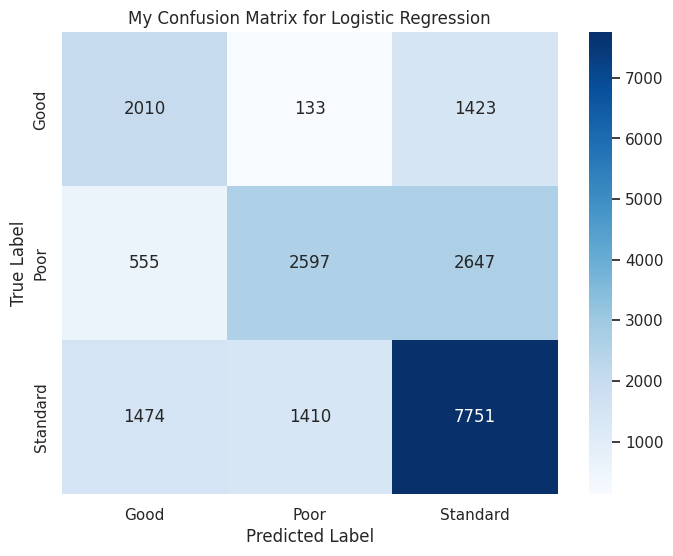

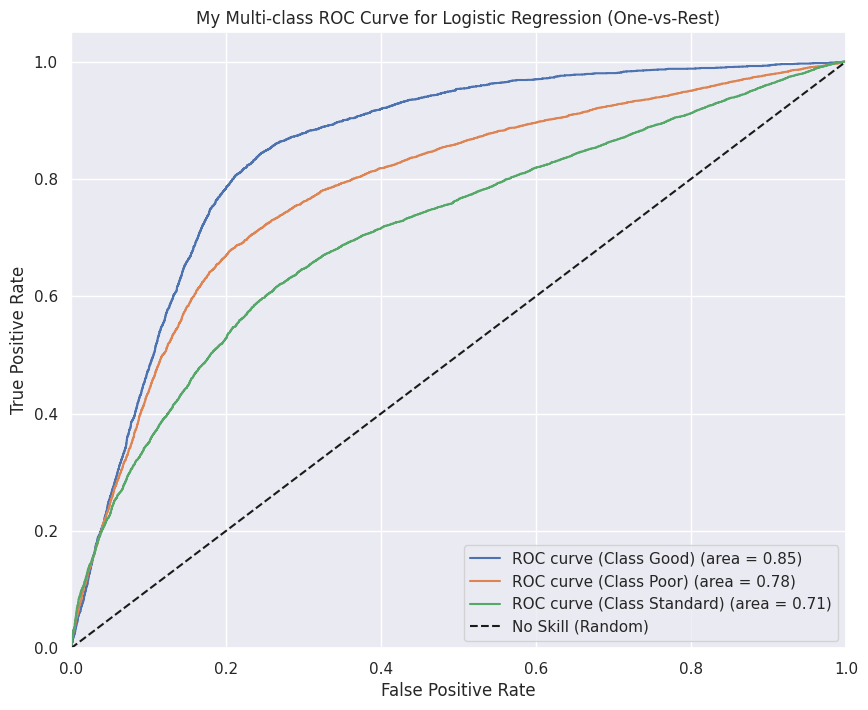


--- Training My Decision Tree Model ---
My Decision Tree Metrics:
  Accuracy: 0.6927
  Precision: 0.6931
  Recall: 0.6927
  F1-Score: 0.6929
  ROC-AUC: 0.7392


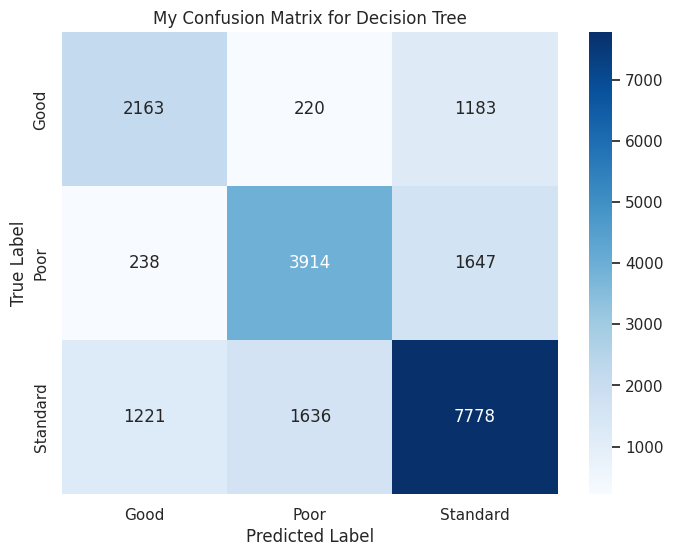

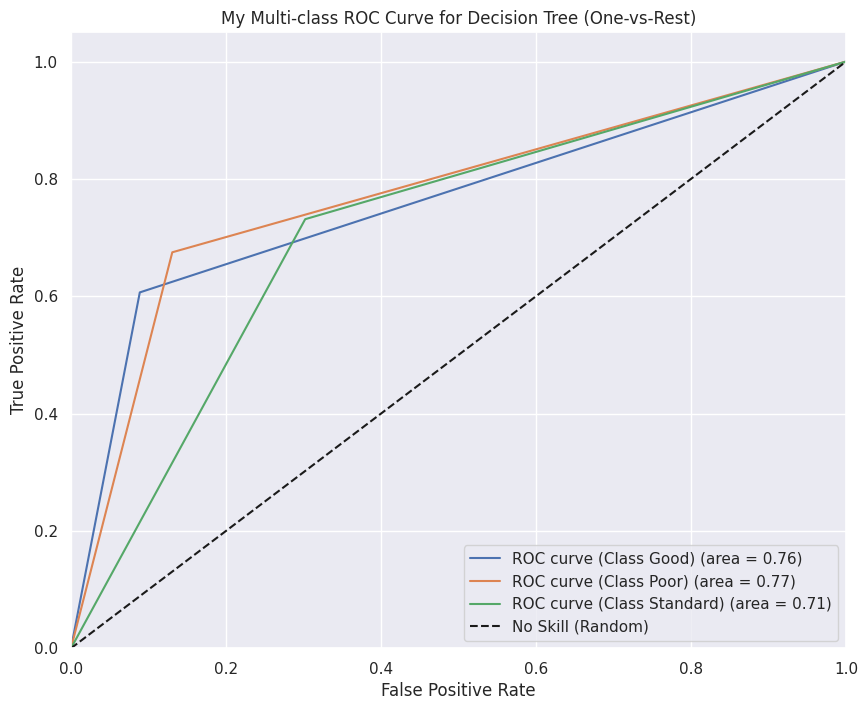


--- Training My Random Forest Model ---
My Random Forest Metrics:
  Accuracy: 0.7696
  Precision: 0.7697
  Recall: 0.7696
  F1-Score: 0.7697
  ROC-AUC: 0.8884


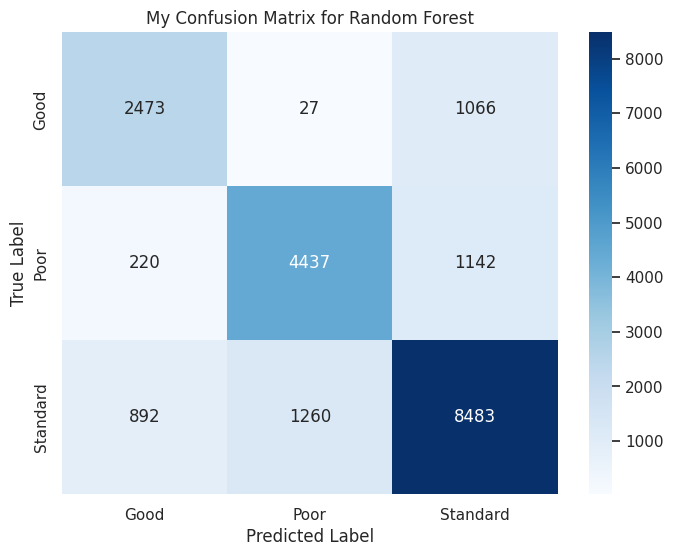

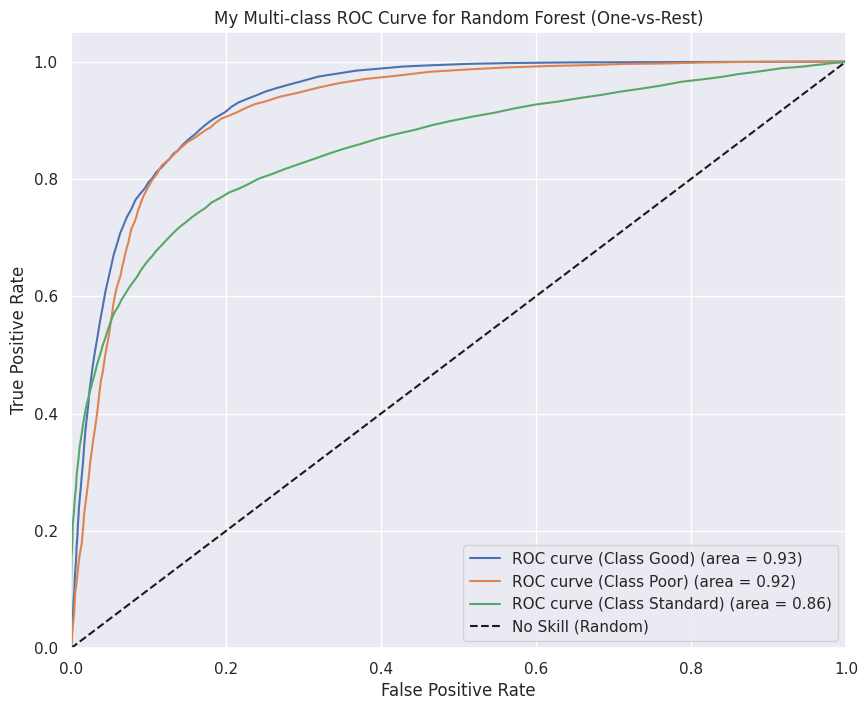

In [59]:
# 4.4 Initializing and Training My Chosen Models

# My Logistic Regression model. I'm increasing max_iter to help it converge and using 'liblinear' solver.
my_logistic_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
my_lr_results = train_and_evaluate_my_model_performance(my_logistic_reg_model, X_train_split, y_train_split, X_val_split, y_val_split, "Logistic Regression", my_label_encoder)

# My Decision Tree Classifier.
my_decision_tree_model = DecisionTreeClassifier(random_state=42)
my_dt_results = train_and_evaluate_my_model_performance(my_decision_tree_model, X_train_split, y_train_split, X_val_split, y_val_split, "Decision Tree", my_label_encoder)

# My Random Forest Classifier. Using 100 trees and all available CPU cores for speed.
my_random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
my_rf_results = train_and_evaluate_my_model_performance(my_random_forest_model, X_train_split, y_train_split, X_val_split, y_val_split, "Random Forest", my_label_encoder)

*4.5 Comparing My Model Performance*

In [60]:
# 4.5 Comparing My Model Performance (Summary)

# I'm storing the results in a dictionary, then converting it to a pandas DataFrame for a nice summary table.
my_model_summary_results = {
    "Logistic Regression": {"Accuracy": my_lr_results[1], "Precision": my_lr_results[2], "Recall": my_lr_results[3], "F1-Score": my_lr_results[4], "ROC-AUC": my_lr_results[5]},
    "Decision Tree": {"Accuracy": my_dt_results[1], "Precision": my_dt_results[2], "Recall": my_dt_results[3], "F1-Score": my_dt_results[4], "ROC-AUC": my_dt_results[5]},
    "Random Forest": {"Accuracy": my_rf_results[1], "Precision": my_rf_results[2], "Recall": my_rf_results[3], "F1-Score": my_rf_results[4], "ROC-AUC": my_rf_results[5]}
}

my_performance_summary_df = pd.DataFrame.from_dict(my_model_summary_results, orient='index')
print("\n--- My Overall Model Performance Summary ---")
print(my_performance_summary_df.round(4))


--- My Overall Model Performance Summary ---
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.6179     0.6193  0.6179    0.6129   0.7576
Decision Tree          0.6928     0.6931  0.6928    0.6929   0.7392
Random Forest          0.7696     0.7697  0.7696    0.7697   0.8884
